In [1]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml("mnist_784",version=1,as_frame=False,)
mnist.keys() 

C:\Users\stallard\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X,y = mnist["data"] , mnist["target"]
X.shape
print(X[0]) 
y[0]

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

'5'

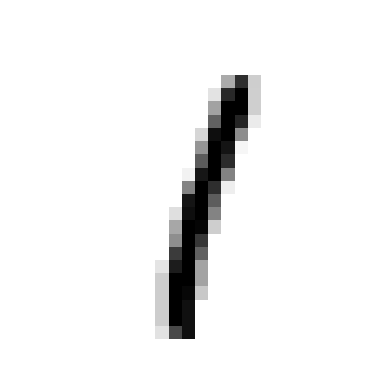

'1'

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import random 
n = random.randint(0, 69999)
some_digit = X[n]
some_digit_image = some_digit.reshape(28,28) 
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off") 
plt.show() 
y[n]

In [15]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:] 


In [34]:
from sklearn.svm import SVC 
svm_clf = SVC() 
svm_clf.fit(X_train, y_train)

In [43]:
n = random.randint(0, 10000)
digits = X_test[n:n+10]
preds = svm_clf.predict(digits)
for i in range(0,10):
    if preds[i] == y_test[n + i]:
        print("Prediction OK")
    else:
        print("Prediction KO" )

Prediction OK
Prediction OK
Prediction OK
Prediction OK
Prediction OK
Prediction OK
Prediction OK
Prediction OK
Prediction OK
Prediction OK


In [74]:
from  sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 
kng = KNeighborsClassifier()

paramGrid  =   { 'weights': ["uniform", "distance"] ,  'n_neighbors' : range(3,10) }
gsvc = GridSearchCV(kng, paramGrid , cv=2 , scoring = "accuracy" , return_train_score=True )

gsvc.fit(X_train, y_train)
gsvc.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [76]:
kng = KNeighborsClassifier(weights='distance', n_neighbors=4)
kng.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [77]:
from sklearn.model_selection import cross_val_score 
cross_val_score(kng,X_train , y_train , cv=3, scoring="accuracy" )

array([0.9709 , 0.9698 , 0.97035])

In [78]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(kng,X_train,y_train, cv=3)
preds

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [79]:
from sklearn.metrics import confusion_matrix 
cf = confusion_matrix(y_train, preds)
nb = 0 
for i in range(0,10):
    nb += cf[i,i]  
print(f"Exactitude : {nb / 60000 }") 

Exactitude : 0.97035


Exactitude : 0.9674166666666667
